For this assignment, you’ll use a real-life dataset of housing prices as published in the Journal of Applied Econometrics. Download the data here.

Explore the following questions. Include a hypothesis, test assumptions and provide valid findings from the data.

Do homes with air conditioning have a higher sales price than homes without air conditioning?
Do homes with a full basement have a higher sales price than homes without a full basement?
As you are conducting the analysis, consider what other variables may be accounting for any significant differences you find.

When you are finished compare your notebook to this one.

# Imports

In [60]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Read and Understand Data

In [61]:
house_prices = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/homeprices.applied.econ.csv')
house_prices.info()
house_prices.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


# Hypothesis

I hypothesize that homes with air conditioning will sell for more than homes without air conditioning. 

# Separation and Understand Data

In [62]:
air_co_yes = house_prices[(house_prices['airco'] == 'yes')]
air_co_no = house_prices[(house_prices['airco'] == 'no')]

In [63]:
air_co_yes.info()
air_co_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 373 to 545
Data columns (total 12 columns):
price       173 non-null float64
lotsize     173 non-null int64
bedrooms    173 non-null int64
bathrms     173 non-null int64
stories     173 non-null int64
driveway    173 non-null object
recroom     173 non-null object
fullbase    173 non-null object
gashw       173 non-null object
airco       173 non-null object
garagepl    173 non-null int64
prefarea    173 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 17.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 372
Data columns (total 12 columns):
price       373 non-null float64
lotsize     373 non-null int64
bedrooms    373 non-null int64
bathrms     373 non-null int64
stories     373 non-null int64
driveway    373 non-null object
recroom     373 non-null object
fullbase    373 non-null object
gashw       373 non-null object
airco       373 non-null object
garagepl    373 non-null int

# Visually Inspect Data for Normal Distribution

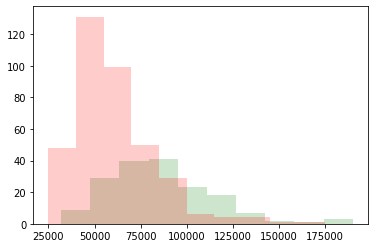

In [64]:
plt.hist(air_co_yes['price'], alpha = .2, color = 'green')
plt.hist(air_co_no['price'], alpha = .2, color = 'red')
plt.show()

# Check Mean, Skewness, and Kurtosis

In [65]:
print('With Air Conditioning: ' + '\n' + '\n' + str(stats.describe(air_co_yes['price'])))
print('\n')
print('Without Air Conditioning: ' + '\n' + '\n' + str(stats.describe(air_co_no['price'])))

With Air Conditioning: 

DescribeResult(nobs=173, minmax=(31900.0, 190000.0), mean=85880.58959537573, variance=810167352.2317516, skewness=0.8558523643779228, kurtosis=0.9609338749117713)


Without Air Conditioning: 

DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.98626363, skewness=1.4196100209360347, kurtosis=3.448225770991252)


# Conclusion

Houseprices for homes with air conditioning have an overall higher mean than those without air conditioning. However, because the high kurtosis of sale prices for homes without air conditioning, we're unable to make solid conclusions on the relationship between air conditioning and homeprices. 

# Separation and Understand Data

In [66]:
full_basememt_yes = house_prices[(house_prices['fullbase'] == 'yes')]
full_basememt_no = house_prices[(house_prices['fullbase'] == 'no')]

In [67]:
full_basememt_yes.info()
full_basememt_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 438
Data columns (total 12 columns):
price       191 non-null float64
lotsize     191 non-null int64
bedrooms    191 non-null int64
bathrms     191 non-null int64
stories     191 non-null int64
driveway    191 non-null object
recroom     191 non-null object
fullbase    191 non-null object
gashw       191 non-null object
airco       191 non-null object
garagepl    191 non-null int64
prefarea    191 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 19.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 125 to 545
Data columns (total 12 columns):
price       355 non-null float64
lotsize     355 non-null int64
bedrooms    355 non-null int64
bathrms     355 non-null int64
stories     355 non-null int64
driveway    355 non-null object
recroom     355 non-null object
fullbase    355 non-null object
gashw       355 non-null object
airco       355 non-null object
garagepl    355 non-null int

# Visually Inspect Data for Normal Distribution

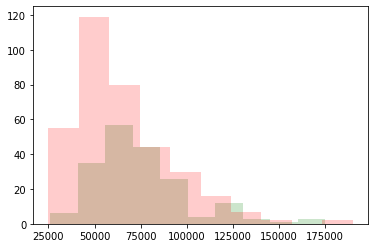

In [68]:
plt.hist(full_basememt_yes['price'], alpha = .2, color = 'green')
plt.hist(full_basememt_no['price'], alpha = .2, color = 'red')
plt.show()

# Check Mean, Skewness, and Kurtosis

In [69]:
print('With Full Basement: ' + '\n' + '\n' + str(stats.describe(full_basememt_yes['price'])))
print('\n')
print('Without Full Basement: ' + '\n' + '\n' + str(stats.describe(full_basememt_no['price'])))

With Full Basement: 

DescribeResult(nobs=191, minmax=(26000.0, 175000.0), mean=74894.50261780104, variance=687483535.4092036, skewness=1.299439350765169, kurtosis=2.200944427832982)


Without Full Basement: 

DescribeResult(nobs=355, minmax=(25000.0, 190000.0), mean=64477.58309859155, variance=690693014.1816344, skewness=1.2539001276811907, kurtosis=1.9898502593432044)


# T-Test

In [70]:
stats.ttest_ind(full_basememt_yes['price'], full_basememt_no['price'])

Ttest_indResult(statistic=4.420628512286621, pvalue=1.1885626562866786e-05)

# Confidence Interval 

In [71]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

In [72]:
get_95_ci(full_basememt_yes['price'], full_basememt_no['price'])

'The difference in means at the 95% confidence interval (two-tail) is between -15032.294775656886 and -5801.544262762097.'

This can be interpreted as saying that with 95% confidence, houses without basements sell on average for roughly $5800 to $15000 less than houses with full basements. 

# Visualizing the Difference in Means with a Pointplot

[[Text(0, 0, 'full_basememt_yes'), Text(0, 0, 'full_basememt_no')]]

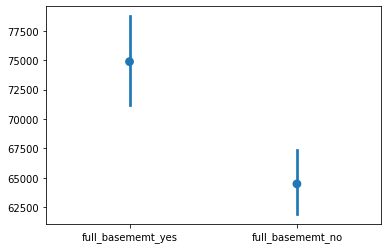

In [73]:
import seaborn as sns

g = sns.pointplot(data=[full_basememt_yes['price'], full_basememt_no['price']], join=False)
                        
g.set(xticklabels = ['full_basememt_yes', 'full_basememt_no'])

Here we can see visually that houses with a full basement sell for significantly morew than houses without a full basement. 

# Conclusion

Homes with a full basement sell for significantly higher than those without full basements. There are other factors that could also contribute to this relationship between basement and homeprice. In order to make final conclusions, the answers to the following would need to be explored:
1.) What is the relationship between homesize and full basements? Do homesizes also increase with the frequencuy of full basements? If they do, homesize might play a larger factor in home price than This e presence of a full basement. 
2.) Similary, what is the relationship between number of rooms and full basements? 
3.) Were the samples of homes with basements collected from the same neighborhood as those without basements? If they were not collected from the same area, the location of the neighborhood could also be impacting home prices. 
4.) What is the relationship with the presence of basements and home age? Are newer or older homes more likely to have a full basement? 